# Stationary state 5

In [1]:
import numpy as np
import matplotlib.pylab as plt
from scipy.integrate import solve_ivp
import pickle

import sys
sys.path.append('../tests/')
from test_solving_KEs_complete import *

In [2]:
"""Complete case test."""
# setup
# TODO: increase these values
N = 100
I0 = 10 
time_max = 20

beta1 = 2 / N       # pairwise infection rate
beta2 = 4 / (N**2)  # hyperedge contagion rate
mu    = 1           # recovery rate

print(f"Setup: \n")
print(f"\tH = Complete Hypergraph, N = {N}, I0 = {I0}\n")
print(f"\tbeta1 = {beta1}, beta2 = {beta2}, mu = {mu}\n")

Setup: 

	H = Complete Hypergraph, N = 100, I0 = 10

	beta1 = 0.02, beta2 = 0.0004, mu = 1



In [15]:
eps = 1e-5 # shift for esp to not start with 0 !

beta1_max = 0.07
beta2_max = 0.0007

beta1_steps = 25
beta2_steps = 25

beta1_vec = np.linspace(eps, beta1_max, beta1_steps)
beta2_vec = np.linspace(eps, beta2_max, beta2_steps)

print(f"beta1: {beta1_vec[:5]}, ..., {beta1_vec[-3:-1]}")
print(f"beta2: {beta2_vec[:5]}, ..., {beta2_vec[-3:-1]}")


beta1: [1.00000e-05 2.92625e-03 5.84250e-03 8.75875e-03 1.16750e-02], ..., [0.0641675  0.06708375]
beta2: [1.000e-05 3.875e-05 6.750e-05 9.625e-05 1.250e-04], ..., [0.0006425  0.00067125]


In [17]:
k_star = np.zeros((beta1_steps, beta2_steps)) # to store the values k^* = E[X(t_max)]

In [18]:
M = N + 1 # number of all states

# set the initial condition
p0 = np.zeros(M)
p0[I0] = 1.0 # all other states have prob 0 at time 0
print(f"p0 = {p0[:20]} ...")

# time range and times to evaluate solution
nsteps = 101
t_span = (0.0, time_max)
t_eval = np.linspace(t_span[0], t_span[1], nsteps)

p0 = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] ...


In [ ]:
solve_for_betas = True
# save solutions to run it once
file_path = '../results/solutions_stationary_state_linspace_1.pickle'

if solve_for_betas:
    solutions = {}
    for i, beta1 in enumerate(beta1_vec):
        for j, beta2 in enumerate(beta2_vec):
            ode_system_complete = list_all_ODEs_complete(N, beta1, beta2, mu)

            def f_ode(t, p):
                return ode_system_complete(t, p)

            sol = solve_ivp(f_ode, 
                            t_span, 
                            p0, 
                            t_eval=t_eval,
                            method="LSODA"
            )
            solutions[str((i, j))] = sol
    # save the solutions
    with open(file_path, "wb") as f:
        pickle.dump(solutions, f)    
else:
    # load solutions
    with open(file_path, "rb") as f:
        solutions = pickle.load(f)    
    

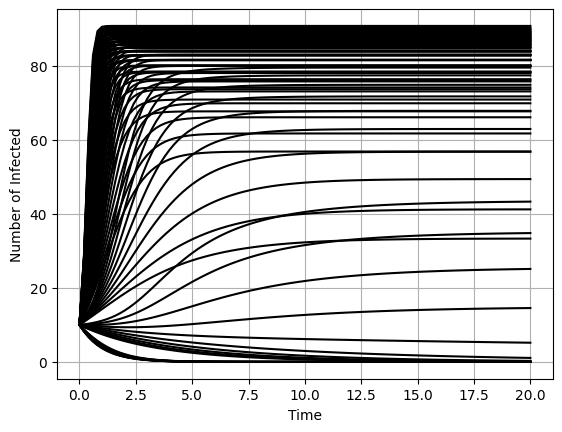

In [13]:
# plot expected values of p_{k}(t) over time t

plt.figure()
for i, beta1 in enumerate(beta1_vec):
    for j, beta2 in enumerate(beta2_vec):
        sol = solutions[str((i, j))]
        expected_values = calculate_expected_values(sol)
        
        k_star[i, j] = expected_values[-1]

        plt.plot(sol.t, expected_values, color="k")

plt.xlabel("Time")
plt.ylabel("Number of Infected")
# plt.legend() # no legend
plt.grid(True)
plt.savefig("../figures/solutions-kolmogorov/complete/stationary-state_linspace_1.pdf", 
            format='pdf', bbox_inches='tight')
plt.show()

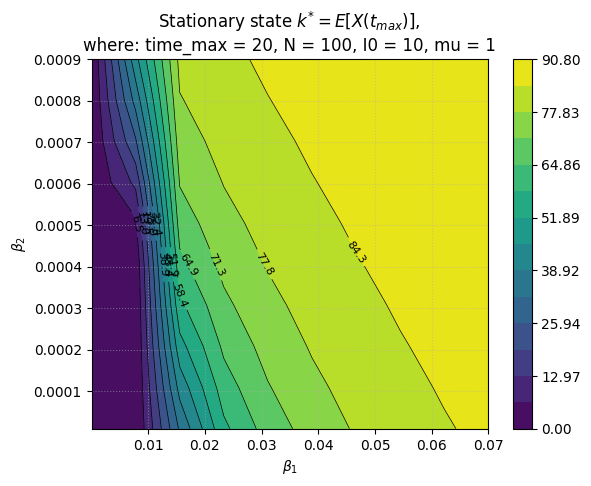

In [14]:
B1, B2 = np.meshgrid(beta1_vec, beta2_vec)
plt.figure()
levels = np.linspace(k_star.min(), k_star.max(), 15) # TODO: set levels

contourf_plot = plt.contourf(B1, B2, k_star.T, levels=levels, cmap='viridis') # use k_star.T!!
contour_plot = plt.contour(B1, B2, k_star.T, levels=contourf_plot.levels, colors='k', linewidths=0.5)

plt.clabel(contour_plot, inline=True, fontsize=8, fmt='%.1f')

cbar = plt.colorbar(contourf_plot)
cbar.set_label(r'')

plt_title = r'Stationary state $k^{*} = E[X(t_{max})]$, '
plt_title += f"\nwhere: time_max = {time_max}, N = {N}, I0 = {I0}, mu = {mu}"
plt.xlabel(r'$\beta_1$')
plt.ylabel(r'$\beta_2$')
plt.title(plt_title)
plt.grid(True, linestyle=':', alpha=0.5)
plt.savefig("../figures/solutions-kolmogorov/complete/stationary-state-contour_linspace_1.pdf", 
            format='pdf', bbox_inches='tight')
plt.show()